In [1]:
###################### Imports ######################

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from matplotlib import rcParams
import glob as glob
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.gridspec as gridspec
import scipy.stats as st
import matplotlib.colors as colors
import matplotlib as mp
from sklearn.linear_model import LinearRegression

###################### Figure style initiation ######################

rcParams.update({'figure.autolayout': True})
MP_LINEWIDTH = 2.
MP_TICKSIZE = 10.
pl.rc('axes', linewidth=MP_LINEWIDTH, edgecolor='k')

# Data imports

## RNAseq data

In [2]:
RNA_data = pd.read_csv("./data/RNA_data.csv", index_col= 0)
RNA_data.head()

,R1 MOCK 0h,R2 MOCK 0h,R1 LPS 0h,R2 LPS 0h,R1 MOCK 01h,R2 MOCK 01h,R1 LPS 01h,R2 LPS 01h,R1 MOCK 02h,R2 MOCK 02h,...,R1 LPS 06h,R2 LPS 06h,R1 MOCK 09h,R2 MOCK 09h,R1 LPS 09h,R2 LPS 09h,R1 MOCK 12h,R2 MOCK 12h,R1 LPS 12h,R2 LPS 12h
Gene Group,,,,,,,,,,,,,,,,,,,,,
Gphn,16.420774,20.332473,16.420774,20.332473,13.333051,13.444587,17.221022,17.859139,8.978326,11.742045,...,28.081796,31.764885,11.318641,11.751758,22.770763,22.382750,14.130799,10.773190,24.201671,28.537305
Actn1,334.088792,397.535880,334.088792,397.535880,322.762893,374.818653,391.960311,382.802402,274.027559,426.439230,...,611.900860,678.592853,360.580482,413.002922,452.331682,533.476342,386.375576,419.559372,319.215801,474.387154
Cul4b,23.149569,18.490939,23.149569,18.490939,24.291620,21.831639,27.358002,17.523768,20.508543,18.985117,...,16.295221,13.302869,24.010361,22.237673,13.551874,13.373896,26.200695,20.252792,16.625934,16.128440
Txn2,303.866030,295.778750,303.866030,295.778750,360.687086,279.836152,266.169489,220.217116,361.210744,267.339292,...,107.001001,81.574585,348.826571,302.863775,92.452049,119.673648,328.613828,261.945167,91.329979,98.009427
Rpl19,2839.648797,2547.251463,2839.648797,2547.251463,2795.011899,3275.830623,2725.651733,2555.572257,3073.746545,2699.560924,...,2343.131318,2578.953467,2759.071453,3033.572347,2388.922224,1933.714030,2758.984089,3043.758371,2441.861469,2140.264212


## MS data (proteins)

In [3]:
P_data = pd.read_csv("./data/protein_data.csv", index_col= 0)
P_data.head()

,M/L MOCK R1 0h,H/L MOCK R1 0h,M/L LPS R1 0h,H/L LPS R1 0h,M/L MOCK R2 0h,H/L MOCK R2 0h,M/L LPS R2 0h,H/L LPS R2 0h,M/L MOCK R1 0.5h,H/L MOCK R1 0.5h,...,M/L LPS R2 12h,H/L LPS R2 12h,M/L MOCK R1 24,H/L MOCK R1 24,M/L LPS R1 24,H/L LPS R1 24,M/L MOCK R2 24,H/L MOCK R2 24,M/L LPS R2 24,H/L LPS R2 24
Gene Group,,,,,,,,,,,,,,,,,,,,,
Gphn,12.096074,0.297156,12.096074,0.297156,6.505031,0.349632,6.505031,0.349632,6.224527,0.269136,...,5.473032,1.480302,3.682307,0.960561,7.893304,5.169083,3.987898,2.390066,5.854278,3.172792
Actn1,132.360291,10.987842,132.360291,10.987842,133.761650,10.373869,133.761650,10.373869,118.447806,16.063269,...,121.248341,30.700277,108.599219,26.549907,112.275538,43.432444,106.208688,25.096000,102.920516,43.541895
Cul4b,8.320294,0.753200,8.320294,0.753200,6.405256,4.520843,6.405256,4.520843,7.261301,1.477359,...,6.095240,1.400039,4.342109,2.490151,2.966669,2.436352,5.878535,3.904356,5.113453,3.703049
Txn2,18.172083,3.832494,18.172083,3.832494,NaN,NaN,NaN,NaN,18.131656,8.133736,...,13.495227,1.564171,18.642921,4.132716,NaN,NaN,NaN,NaN,10.029196,2.102674
Rpl19,425.431939,62.002934,425.431939,62.002934,529.701706,43.580299,529.701706,43.580299,414.024187,56.376897,...,496.728929,107.109777,413.956399,109.287652,436.776113,160.401852,545.003483,182.520276,605.854306,196.250215


## Modeling data (rates)

In [4]:
param_data = pd.read_csv("./data/param_estimates_microshares.csv", index_col= 0)
param_data.head()

,D0.R1.ESTIMATE,D0.R1.CI.LOW,D0.R1.CI.HI,D0.R2.ESTIMATE,D0.R2.CI.LOW,D0.R2.CI.HI,D(MOCK).R1.ESTIMATE,D(MOCK).R1.CI.LOW,D(MOCK).R1.CI.HI,D(MOCK).R2.ESTIMATE,...,M0.R1.CI.HI,M0.R2.ESTIMATE,M0.R2.CI.LOW,M0.R2.CI.HI,grass.R1.ESTIMATE,grass.R1.CI.LOW,grass.R1.CI.HI,grass.R2.ESTIMATE,grass.R2.CI.LOW,grass.R2.CI.HI
Gene Group,,,,,,,,,,,,,,,,,,,,,
Aifm1,0.011576,0.004181,0.032047,0.005972,0.002139,0.016673,1.301801,0.780848,2.170314,1.188609,...,80.637068,85.690797,81.053327,90.593599,17.983471,15.833314,20.425617,14.910980,13.271567,16.752906
Tmem214,0.024201,0.003216,0.182099,0.073208,0.039778,0.134734,1.349957,0.798573,2.282049,2.624270,...,2.784356,1.849789,1.442988,2.371274,2.098246,1.384802,3.179254,1.017224,0.657861,1.572892
Smad2,0.032068,0.024664,0.041695,0.035396,0.026947,0.046494,0.855036,0.560842,1.303551,0.809163,...,10.368326,11.584888,11.222288,11.959204,1.053275,0.717038,1.547182,0.715147,0.546163,0.936416
Pcnt,0.021072,0.005949,0.074644,0.017826,0.007970,0.039873,1.368431,0.808442,2.316313,1.271858,...,0.629408,0.525449,0.474155,0.582291,0.168062,0.129819,0.217571,0.138020,0.116675,0.163270
Stx5a,0.005316,0.001582,0.017860,0.021171,0.004145,0.108138,1.222198,0.736129,2.029221,1.539285,...,5.897320,7.695222,5.719027,10.354286,2.700372,1.968230,3.704856,2.067505,1.458028,2.931751


## Rates processing

In [5]:
RNA_measured_0_LPS = []
RNA_measured_12_LPS = []
P_measured_0_LPS = []
P_measured_12_LPS = []
computed_s = []
computed_k = []
computed_s0 = []
computed_k0 = []
count = 0
list_genes = []
for gene in RNA_data.index:
    if gene in param_data.index:
        RNA_measured_0_LPS += [np.mean(RNA_data.loc[gene, ["R1 LPS 0h", "R2 LPS 0h"]])]
        RNA_measured_12_LPS += [np.mean(RNA_data.loc[gene, ["R1 LPS 12h", "R2 LPS 12h"]])]
        computed_s += [np.mean(param_data.loc[gene, ["T(LPS).R1.ESTIMATE", "T(LPS).R2.ESTIMATE"]])]
        computed_k += [np.mean(param_data.loc[gene, ["D(LPS).R1.ESTIMATE", "D(LPS).R2.ESTIMATE"]])]
        computed_s0 += [np.mean(param_data.loc[gene, ["T0.R1.ESTIMATE", "T0.R2.ESTIMATE"]])]
        computed_k0 += [np.mean(param_data.loc[gene, ["D0.R1.ESTIMATE", "D0.R2.ESTIMATE"]])]
        prot_R1_0 = np.sum(P_data.loc[gene, ["M/L LPS R1 0h", "H/L LPS R1 0h"]]) 
        prot_R2_0 = np.sum(P_data.loc[gene, ["M/L LPS R2 0h", "H/L LPS R2 0h"]]) 
        prot_R1_12 = np.sum(P_data.loc[gene, ["M/L LPS R1 12h", "H/L LPS R1 12h"]]) 
        prot_R2_12 = np.sum(P_data.loc[gene, ["M/L LPS R2 12h", "H/L LPS R2 12h"]]) 
        P_measured_0_LPS += [np.mean([prot_R1_0,prot_R2_0])]
        P_measured_12_LPS +=[np.mean([prot_R1_12,prot_R2_12])]
        list_genes += [gene]
    else:
        count+=1
FI_RNA = np.array(RNA_measured_12_LPS)/np.array(RNA_measured_0_LPS)
FI_P = np.array(P_measured_12_LPS)/np.array(P_measured_0_LPS)
FI_P_theo = FI_RNA*np.array(computed_s)/np.array(computed_k)
print(count)

List_s_0 = np.array(RNA_measured_0_LPS)*np.array(computed_s0)
List_s_12 = np.array(RNA_measured_12_LPS)*np.array(computed_s0)*np.array(computed_s)
List_k_0 = np.array(computed_k0)
List_k_12 = np.array(computed_k0)*np.array(computed_k)

0


/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_50442/617388235.py:29: RuntimeWarning: divide by zero encountered in true_divide
  FI_P = np.array(P_measured_12_LPS)/np.array(P_measured_0_LPS)


# Figure 1C

## Contributions computations

In [6]:
List_a_RNA =  np.abs((np.array(RNA_measured_12_LPS) - np.array(RNA_measured_0_LPS)) * np.array(computed_s0)*np.array(computed_s))
List_a_translation = np.abs(np.array(RNA_measured_0_LPS)*(np.array(computed_s0)*np.array(computed_s) - np.array(computed_s0)))
List_a_P = np.abs(np.array(computed_k0)*np.array(computed_k) * (np.array(P_measured_12_LPS) - np.array(P_measured_0_LPS)))
List_a_degradation = np.abs(P_measured_0_LPS * (np.array(computed_k0)*np.array(computed_k) - np.array(computed_k0)))


List_a_RNA_abs =  (np.array(RNA_measured_12_LPS) - np.array(RNA_measured_0_LPS)) * np.array(computed_s0)*np.array(computed_s)
List_a_translation_abs = np.array(RNA_measured_0_LPS)*(np.array(computed_s0)*np.array(computed_s) - np.array(computed_s0))
List_a_P_abs = np.array(computed_k0)*np.array(computed_k) * (np.array(P_measured_12_LPS) - np.array(P_measured_0_LPS))
List_a_degradation_abs = P_measured_0_LPS * (np.array(computed_k0)*np.array(computed_k) - np.array(computed_k0))

List_tot_percent = List_a_RNA + List_a_translation + List_a_P + List_a_degradation

List_RNA_percent = List_a_RNA/List_tot_percent
mean_RNA = np.mean(List_RNA_percent)

List_tanslation_percent = List_a_translation/List_tot_percent
mean_translation = np.mean(List_tanslation_percent)

List_P_percent = List_a_P/List_tot_percent
mean_P = np.mean(List_P_percent)

List_degradation_percent = List_a_degradation/List_tot_percent
mean_deg = np.mean(List_degradation_percent)

## Plot

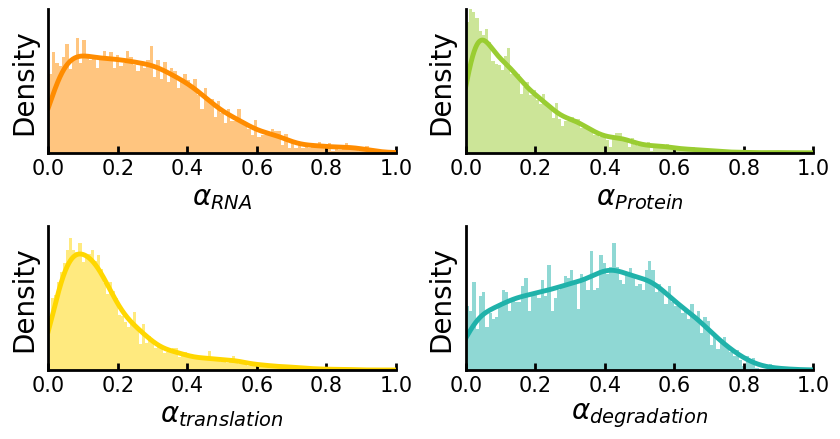

In [7]:
fig = pl.figure(figsize=(8.5,4.5))
gs = gridspec.GridSpec(2, 2)

ax = pl.subplot(gs[0, 0])


xs = np.linspace(-0.5, 1,5000)
density = st.gaussian_kde(List_RNA_percent)
ax.plot(xs, density(xs), lw=3.5, color="darkorange")
#ax.fill_between(xs, density(xs), color="blue", alpha=0.25, label="0 h")
ax.hist(List_RNA_percent, bins=100, density=True,align='mid', alpha=0.5, color="darkorange")


    
    
tick_size = 15 
ax.tick_params(
    which='major',
    direction='in',
    bottom=True,
    top=False,
    left=False,
    right=False)


ax.axes.yaxis.set_ticklabels([])

pl.locator_params(axis='x', nbins=6)
pl.locator_params(axis='y', nbins=6)
for tick in pl.gca().xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_minor_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
pl.xlabel(r"$\alpha_{RNA}$", size=20)
pl.ylabel("Density",size=20)



pl.ylim(0,3)
pl.xlim(0,1)

ax = pl.subplot(gs[1, 0])
xs = np.linspace(-0.5, 1,5000)
density = st.gaussian_kde(List_tanslation_percent)
ax.plot(xs, density(xs), lw=3.5, color="gold")
#ax.fill_between(xs, density(xs), color="blue", alpha=0.25, label="0 h")
ax.hist(List_tanslation_percent, bins=100, density=True,align='mid', alpha=0.5, color="gold")


    
    
tick_size = 15 
ax.tick_params(
    which='major',
    direction='in',
    bottom=True,
    top=False,
    left=False,
    right=False)


ax.axes.yaxis.set_ticklabels([])

pl.locator_params(axis='x', nbins=6)
pl.locator_params(axis='y', nbins=6)
for tick in pl.gca().xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_minor_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
pl.xlabel(r"$\alpha_{translation}$", size=20)
pl.ylabel("Density",size=20)



pl.ylim(0,5)
pl.xlim(0,1)

ax = pl.subplot(gs[0, 1])


xs = np.linspace(-0.5, 1,5000)
density = st.gaussian_kde(List_P_percent)
ax.plot(xs, density(xs), lw=3.5, color="yellowgreen")
#ax.fill_between(xs, density(xs), color="blue", alpha=0.25, label="0 h")
ax.hist(List_P_percent, bins=100, density=True,align='mid', alpha=0.5, color="yellowgreen")


    
    
tick_size = 15 
ax.tick_params(
    which='major',
    direction='in',
    bottom=True,
    top=False,
    left=False,
    right=False)


ax.axes.yaxis.set_ticklabels([])

pl.locator_params(axis='x', nbins=6)
pl.locator_params(axis='y', nbins=6)
for tick in pl.gca().xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_minor_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
pl.xlabel(r"$\alpha_{Protein}$", size=20)
pl.ylabel("Density",size=20)



pl.ylim(0,5)
pl.xlim(0,1)




ax = pl.subplot(gs[1, 1])


xs = np.linspace(-0.5, 1,5000)
density = st.gaussian_kde(List_degradation_percent)
ax.plot(xs, density(xs), lw=3.5, color="lightseagreen")
#ax.fill_between(xs, density(xs), color="blue", alpha=0.25, label="0 h")
ax.hist(List_degradation_percent, bins=100, density=True,align='mid', alpha=0.5, color="lightseagreen")


    
    
tick_size = 15 
ax.tick_params(
    which='major',
    direction='in',
    bottom=True,
    top=False,
    left=False,
    right=False)


ax.axes.yaxis.set_ticklabels([])

pl.locator_params(axis='x', nbins=6)
pl.locator_params(axis='y', nbins=6)
for tick in pl.gca().xaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
for tick in pl.gca().yaxis.get_minor_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
pl.xlabel(r"$\alpha_{degradation}$", size=20)
pl.ylabel("Density",size=20)



pl.ylim(0,2.5)
pl.xlim(0,1)

pl.savefig("./figures/figure1C.pdf",bbox_inches = 'tight')

# Figure 1D

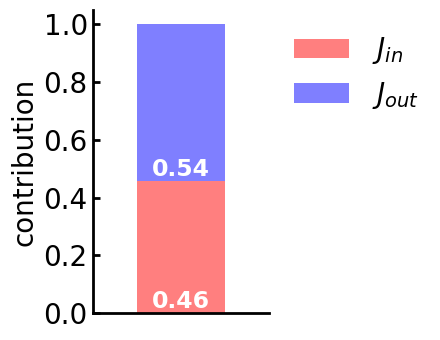

In [8]:
fig, ax = pl.subplots(figsize=(4.5,3.5))
ax.bar([0], mean_RNA + mean_translation, label=r'$J_{in}$',width=0.4, color="red", alpha=0.5)

ax.bar([0], mean_deg+mean_P, bottom=mean_RNA +mean_translation,
       label=r'$J_{out}$',width=0.4, color="blue", alpha=0.5)

ax.text(0,0,np.round(mean_RNA + mean_translation,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="white")
ax.text(0,mean_RNA +mean_translation,np.round(mean_deg+mean_P,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="white")



ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_xlim(-0.4,0.4)
tick_size = 20
ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=True,
    right=False)


ax.axes.xaxis.set_ticklabels([])
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
    
ax.legend(fontsize=20, markerscale=1.75, frameon=False,  bbox_to_anchor=(1, 1))

pl.ylabel("contribution",size=20)

pl.savefig("figures/figure1D.pdf",bbox_inches = 'tight')




# Figure 1E

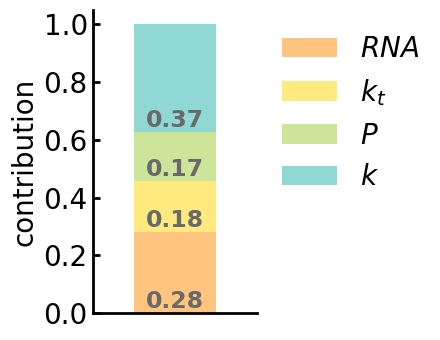

In [9]:
fig, ax = pl.subplots(figsize=(4.5,3.5))

ax.bar([0], mean_RNA, label='$RNA$',width=0.4, color="darkorange", alpha=0.5)
ax.bar([0], mean_translation, bottom=mean_RNA,
       label='$k_t$',width=0.4, color="gold", alpha=0.5)
ax.bar([0], mean_P, bottom=mean_RNA +mean_translation,
       label='$P$',width=0.4, color="yellowgreen", alpha=0.5)
ax.bar([0], mean_deg, bottom=mean_RNA +mean_translation +mean_P,
       label='$k$',width=0.4, color="lightseagreen", alpha=0.5)

ax.text(0,0,np.round(mean_RNA,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="dimgrey")
ax.text(0,mean_RNA,np.round(mean_translation,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="dimgrey")
ax.text(0,mean_RNA +mean_translation,np.round(mean_P,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="dimgrey")
ax.text(0,mean_RNA +mean_translation +mean_P,np.round(mean_deg,2),horizontalalignment='center',verticalalignment='bottom', fontsize=17,weight="semibold", color="dimgrey")




ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_xlim(-0.4,0.4)
tick_size = 20
ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=True,
    right=False)


ax.axes.xaxis.set_ticklabels([])
for tick in pl.gca().yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
    
ax.legend(fontsize=20, markerscale=1.75, frameon=False,  bbox_to_anchor=(1, 1))

pl.ylabel("contribution",size=20)

pl.savefig("figures/figure1E.pdf",bbox_inches = 'tight')


